In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [2]:
from google.colab import files
uploaded = files.upload()

Saving kidney_disease.csv to kidney_disease.csv


In [3]:
df = pd.read_csv('/content/kidney_disease.csv')

In [4]:
column_rename_map = {
    'bp': 'blood_pressure',
    'sg': 'specific_gravity',
    'al': 'albumin',
    'su': 'sugar',
    'rbc': 'red_blood_cells',
    'pc': 'pus_cell',
    'pcc': 'pus_cell_clumps',
    'ba': 'bacteria',
    'bgr': 'blood_glucose_random',
    'bu': 'blood_urea',
    'sc': 'serum_creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'hemoglobin',
    'pcv': 'packed_cell_volume',
    'wc': 'white_blood_cell_count',
    'rc': 'red_blood_cell_count',
    'htn': 'hypertension',
    'dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease',
    'appet': 'appetite',
    'pe': 'pedal_edema',
    'ane': 'anemia'
}

df = df.rename(columns=column_rename_map)
print("\nRenamed columns:", df.columns.tolist())


Renamed columns: ['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'classification']


In [5]:
print("\nInitial shape:", df.shape)
print("\nInitial info:")
print(df.info())


Initial shape: (400, 26)

Initial info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null  

In [6]:
print("\nNull values before handling:")
print(df.isnull().sum())


Null values before handling:
id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64


In [7]:
num_cols = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
            'blood_glucose_random', 'blood_urea', 'serum_creatinine',
            'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume',
            'white_blood_cell_count', 'red_blood_cell_count']

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, handling errors
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-7-1573583042.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [8]:
cat_cols = ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
            'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
            'appetite', 'pedal_edema', 'anemia']

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-8-383520542.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [9]:
print("\nNull values after handling:")
print(df.isnull().sum())


Null values after handling:
id                         0
age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
dtype: int64


In [10]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [11]:
cat_cols.remove('classification')
print("\nCategorical columns:", cat_cols)



Categorical columns: ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia']


In [12]:
print("\nUnique values in categorical columns:")
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

# Clean categorical columns (some have inconsistent values)
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace({' yes': 'yes', '\tyes': 'yes', '\tno': 'no'})
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace({'\tno': 'no'})
df['classification'] = df['classification'].replace({'ckd\t': 'ckd'})


Unique values in categorical columns:
red_blood_cells: ['normal' 'abnormal']
pus_cell: ['normal' 'abnormal']
pus_cell_clumps: ['notpresent' 'present']
bacteria: ['notpresent' 'present']
hypertension: ['yes' 'no']
diabetes_mellitus: ['yes' 'no' ' yes' '\tno' '\tyes']
coronary_artery_disease: ['no' 'yes' '\tno']
appetite: ['good' 'poor']
pedal_edema: ['no' 'yes']
anemia: ['no' 'yes']


In [13]:
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
    print(f"\n{col} after encoding:")
    print(df[col].value_counts())

# Also encode the target variable
le = LabelEncoder()
df['classification'] = le.fit_transform(df['classification'])
print("\nTarget variable after encoding:")
print(df['classification'].value_counts())


red_blood_cells after encoding:
red_blood_cells
1    353
0     47
Name: count, dtype: int64

pus_cell after encoding:
pus_cell
1    324
0     76
Name: count, dtype: int64

pus_cell_clumps after encoding:
pus_cell_clumps
0    358
1     42
Name: count, dtype: int64

bacteria after encoding:
bacteria
0    378
1     22
Name: count, dtype: int64

hypertension after encoding:
hypertension
0    253
1    147
Name: count, dtype: int64

diabetes_mellitus after encoding:
diabetes_mellitus
0    263
1    137
Name: count, dtype: int64

coronary_artery_disease after encoding:
coronary_artery_disease
0    366
1     34
Name: count, dtype: int64

appetite after encoding:
appetite
0    318
1     82
Name: count, dtype: int64

pedal_edema after encoding:
pedal_edema
0    324
1     76
Name: count, dtype: int64

anemia after encoding:
anemia
0    340
1     60
Name: count, dtype: int64

Target variable after encoding:
classification
0    250
1    150
Name: count, dtype: int64


In [14]:
print("\nNumerical columns statistics:")
print(df[num_cols].describe())

# For demonstration, let's normalize one numerical column (you can extend this to others)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['blood_urea'] = scaler.fit_transform(df[['blood_urea']])

print("\nBlood urea after normalization:")
print(df['blood_urea'].describe())



Numerical columns statistics:
              age  blood_pressure  specific_gravity    albumin       sugar  \
count  400.000000      400.000000        400.000000  400.00000  400.000000   
mean    51.562500       76.575000          1.017712    0.90000    0.395000   
std     16.982996       13.489785          0.005434    1.31313    1.040038   
min      2.000000       50.000000          1.005000    0.00000    0.000000   
25%     42.000000       70.000000          1.015000    0.00000    0.000000   
50%     55.000000       80.000000          1.020000    0.00000    0.000000   
75%     64.000000       80.000000          1.020000    2.00000    0.000000   
max     90.000000      180.000000          1.025000    5.00000    5.000000   

       blood_glucose_random  blood_urea  serum_creatinine      sodium  \
count            400.000000  400.000000        400.000000  400.000000   
mean             145.062500   56.693000          2.997125  137.631250   
std               75.260774   49.395258        

In [15]:
print("\nFinal dataset info:")
print(df.info())
print("\nFinal null check:")
print(df.isnull().sum().sum())


Final dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      400 non-null    float64
 2   blood_pressure           400 non-null    float64
 3   specific_gravity         400 non-null    float64
 4   albumin                  400 non-null    float64
 5   sugar                    400 non-null    float64
 6   red_blood_cells          400 non-null    int64  
 7   pus_cell                 400 non-null    int64  
 8   pus_cell_clumps          400 non-null    int64  
 9   bacteria                 400 non-null    int64  
 10  blood_glucose_random     400 non-null    float64
 11  blood_urea               400 non-null    float64
 12  serum_creatinine         400 non-null    float64
 13  sodium                   400 non-null    float64
 14  potas

In [16]:
df.to_csv('kidney_disease_cleaned.csv', index=False)
files.download('kidney_disease_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Exploratory data analysis

In [17]:
df.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.562500,76.575000,1.017712,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,...,39.082500,8298.500000,4.737750,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.375000
std,115.614301,16.982996,13.489785,0.005434,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,...,8.162245,2529.593814,0.841439,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,2200.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,34.000000,6975.000000,4.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,80.000000,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,40.000000,8000.000000,4.800000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,44.000000,9400.000000,5.100000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,...,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


Visual analysis

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
from google.colab import files
uploaded = files.upload()


Saving kidney_disease_cleaned.csv to kidney_disease_cleaned (1).csv


In [20]:
df = pd.read_csv('/content/kidney_disease_cleaned.csv')


In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>


=== Univariate Analysis ===


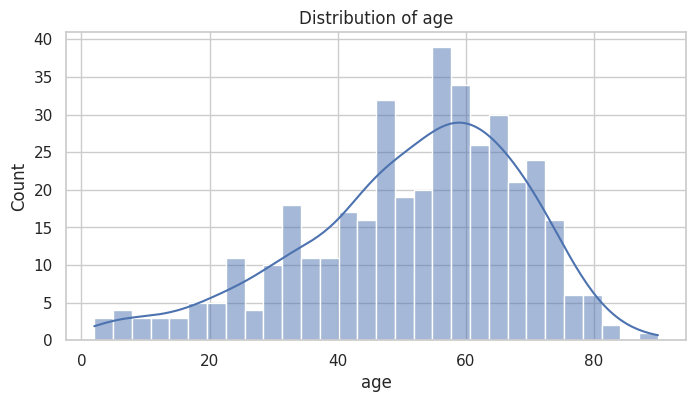

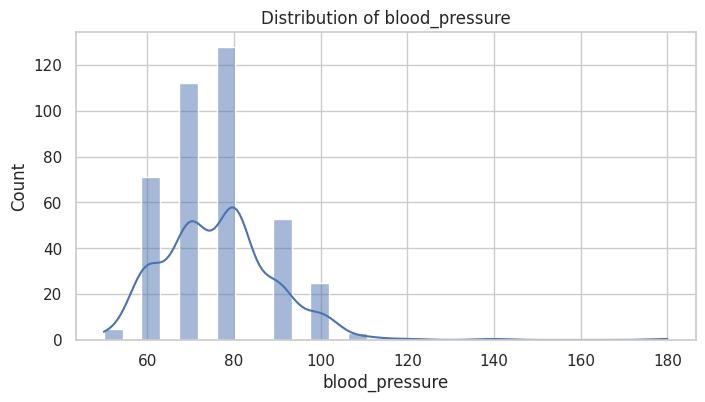

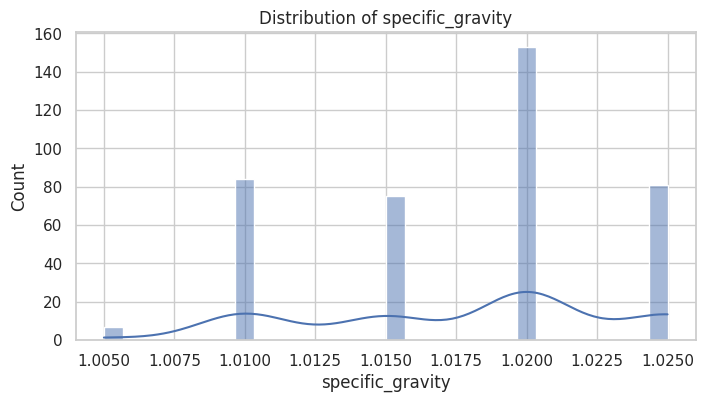

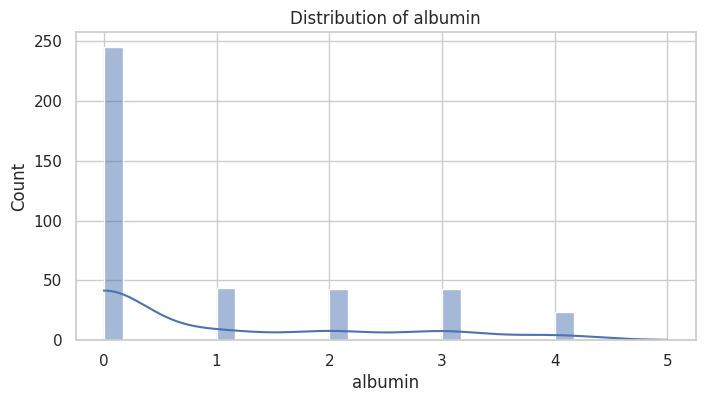

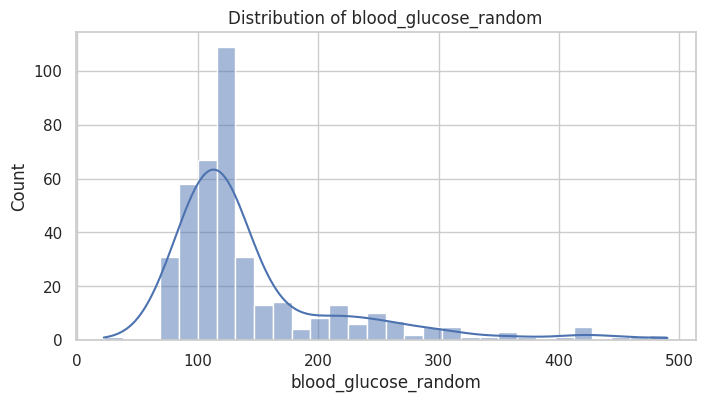

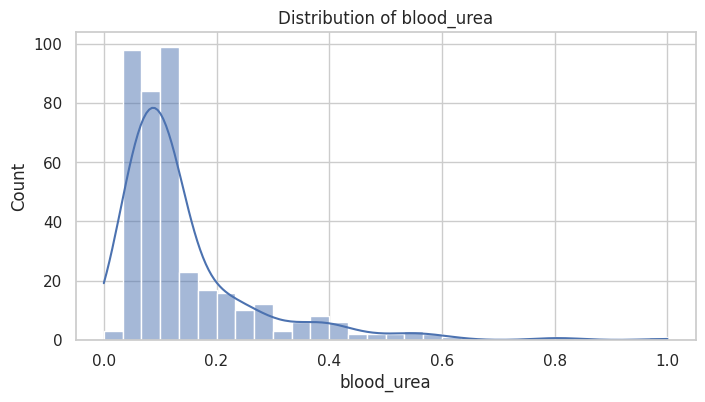

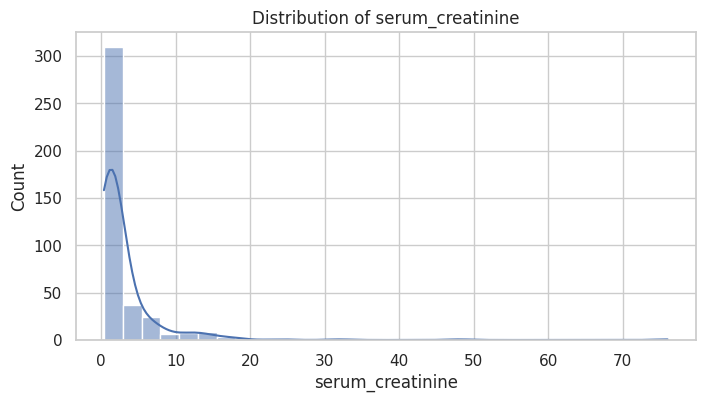

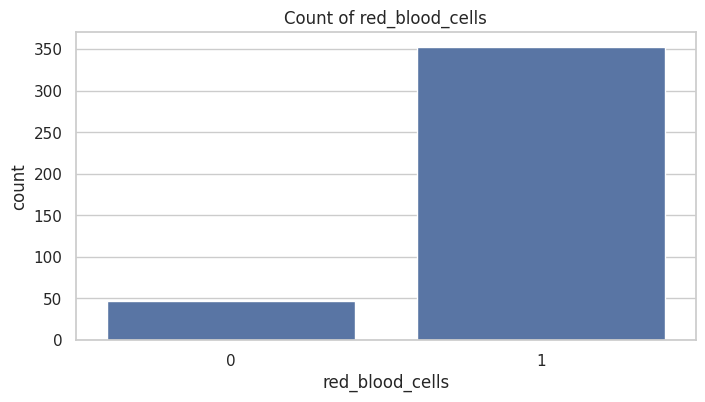

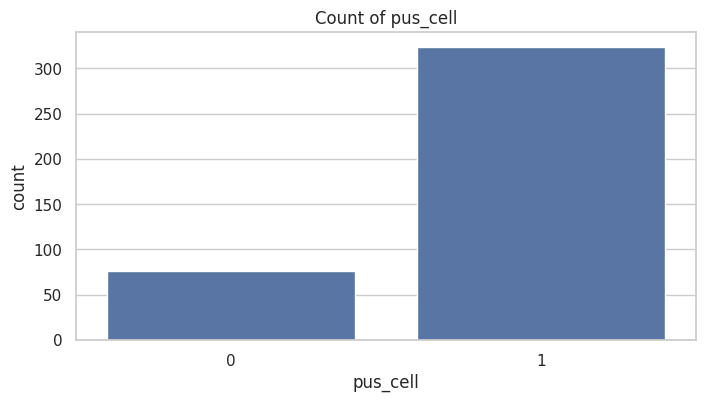

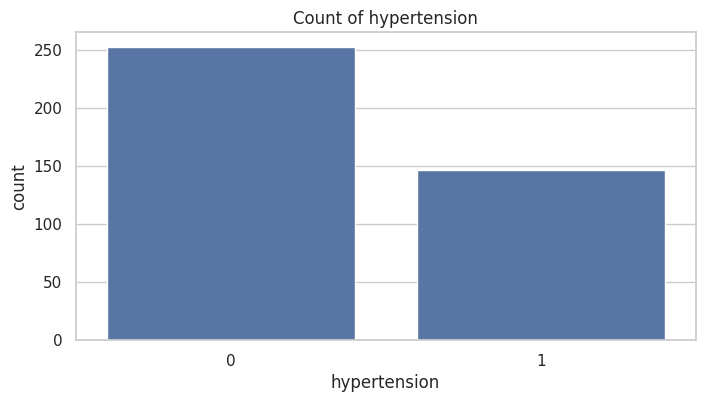

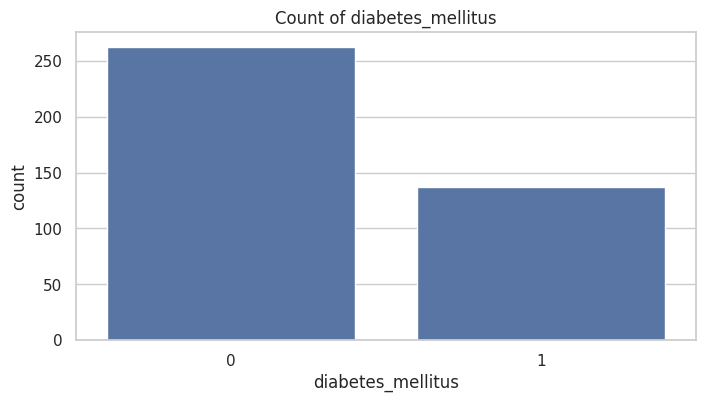

In [22]:
# Activity 2.1: Univariate analysis
print("\n=== Univariate Analysis ===")

# Select some numerical columns for univariate analysis
num_cols = ['age', 'blood_pressure', 'specific_gravity', 'albumin',
            'blood_glucose_random', 'blood_urea', 'serum_creatinine']

# Plot distribution plots for numerical columns
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Plot count plots for categorical columns
cat_cols = ['red_blood_cells', 'pus_cell', 'hypertension', 'diabetes_mellitus']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.show()


=== Bivariate Analysis ===


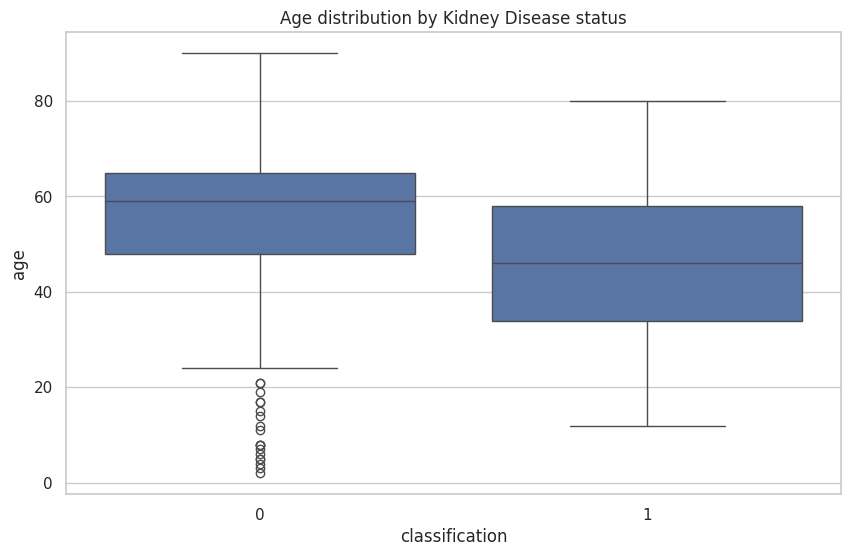

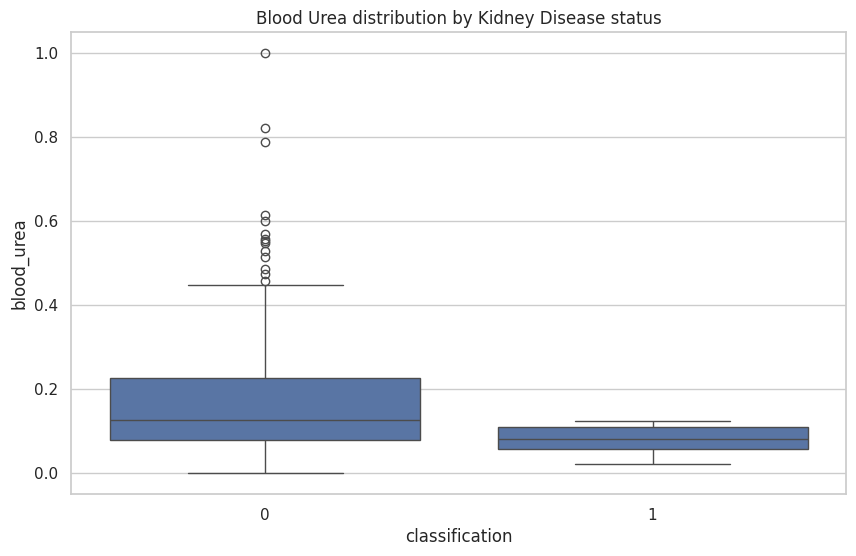

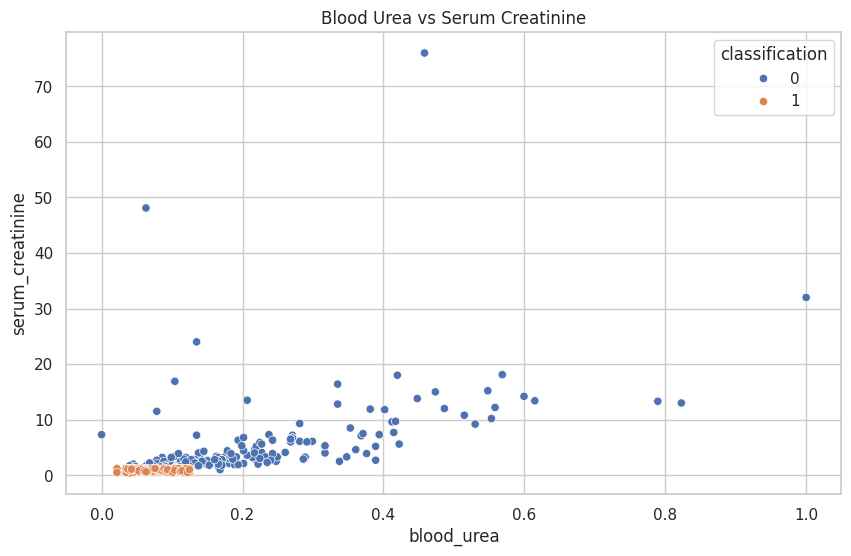

In [23]:
# Activity 2.2: Bivariate analysis
print("\n=== Bivariate Analysis ===")

# Plot relationships between numerical features and target
plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='age', data=df)
plt.title('Age distribution by Kidney Disease status')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='blood_urea', data=df)
plt.title('Blood Urea distribution by Kidney Disease status')
plt.show()

# Scatter plot between two numerical features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='blood_urea', y='serum_creatinine', hue='classification', data=df)
plt.title('Blood Urea vs Serum Creatinine')
plt.show()


=== Multivariate Analysis ===


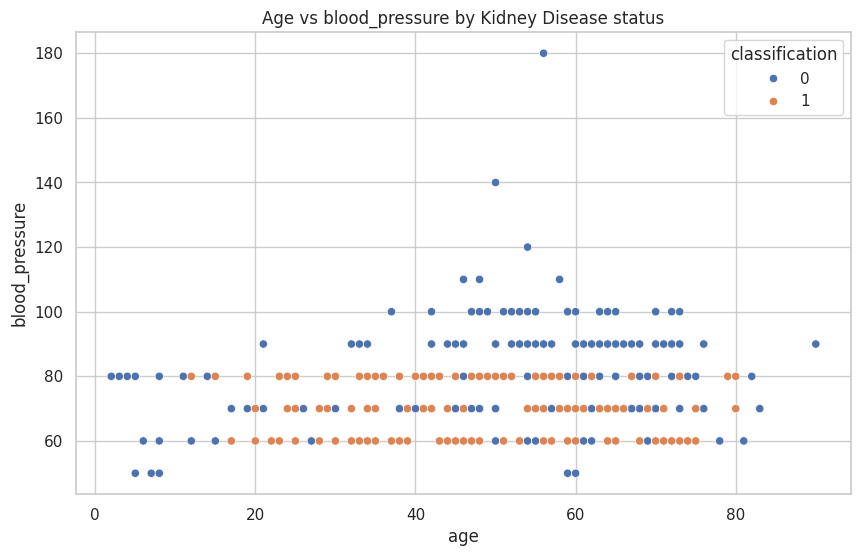

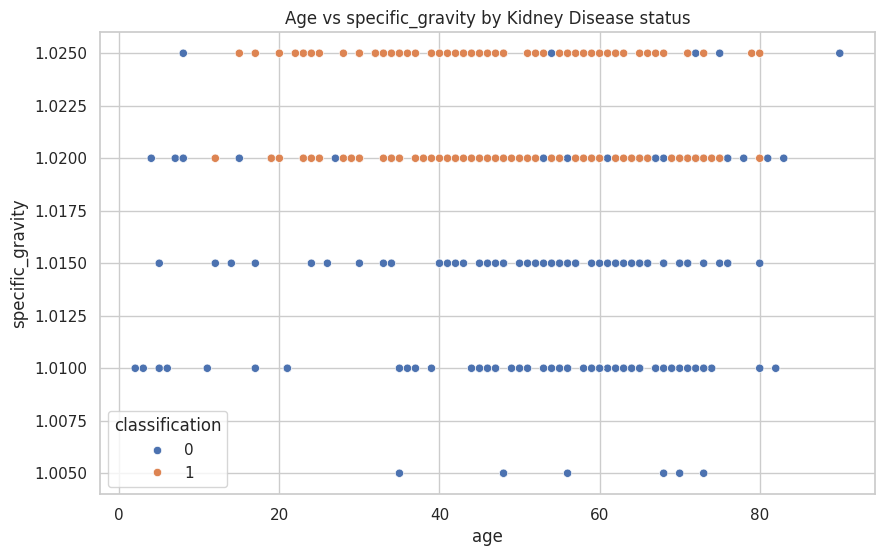

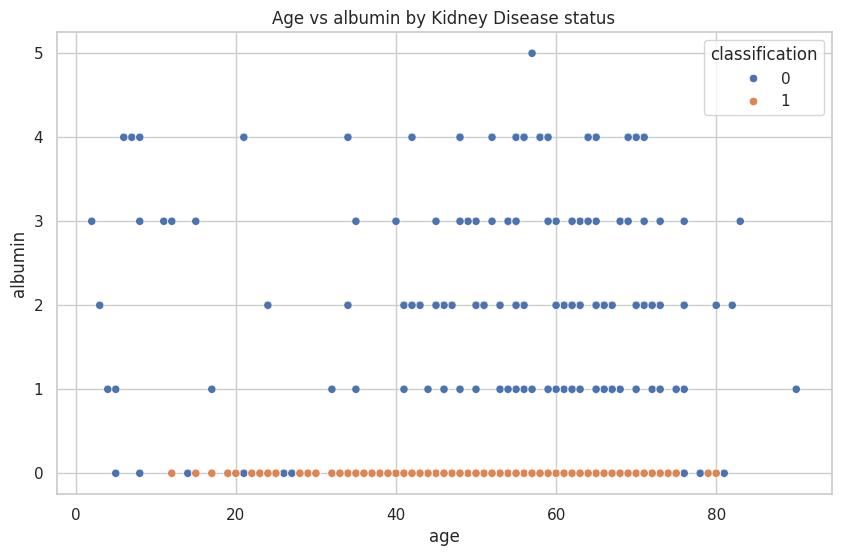

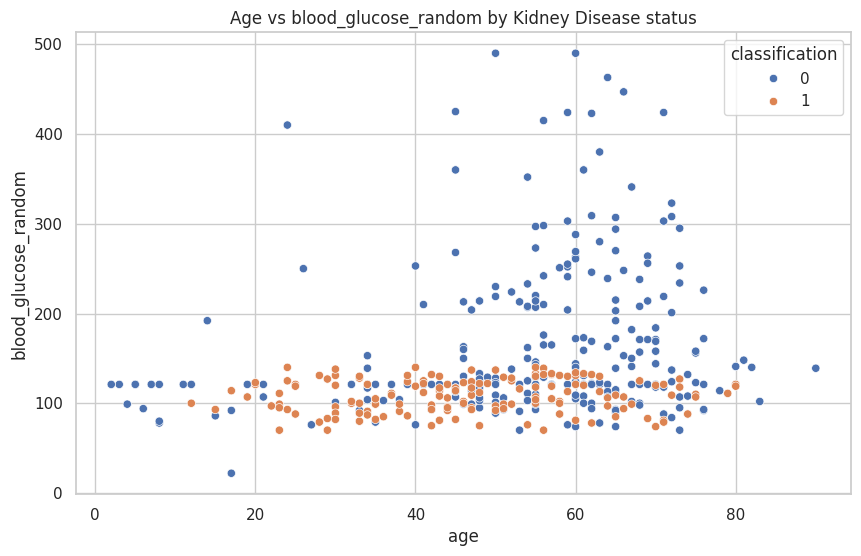

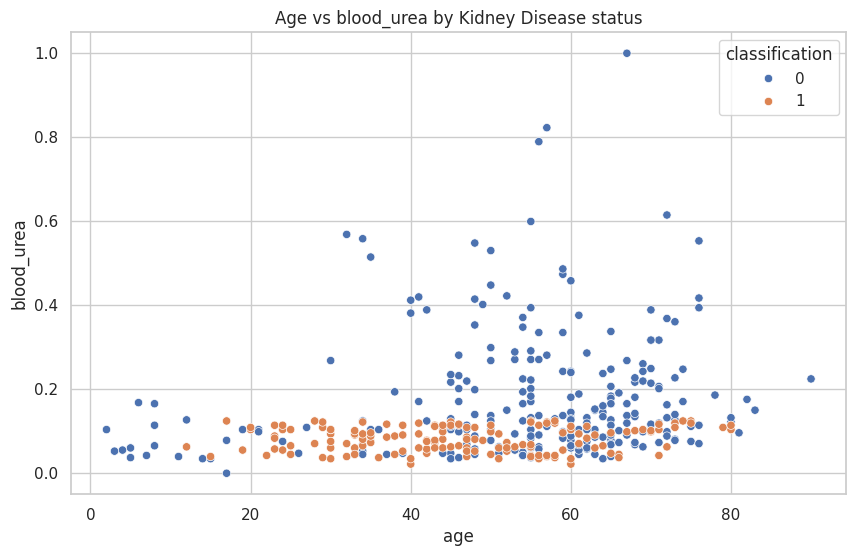

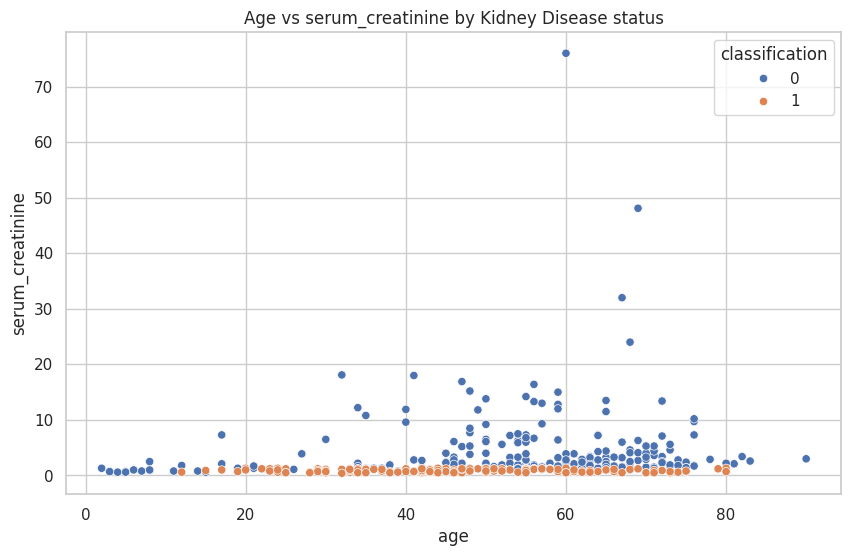

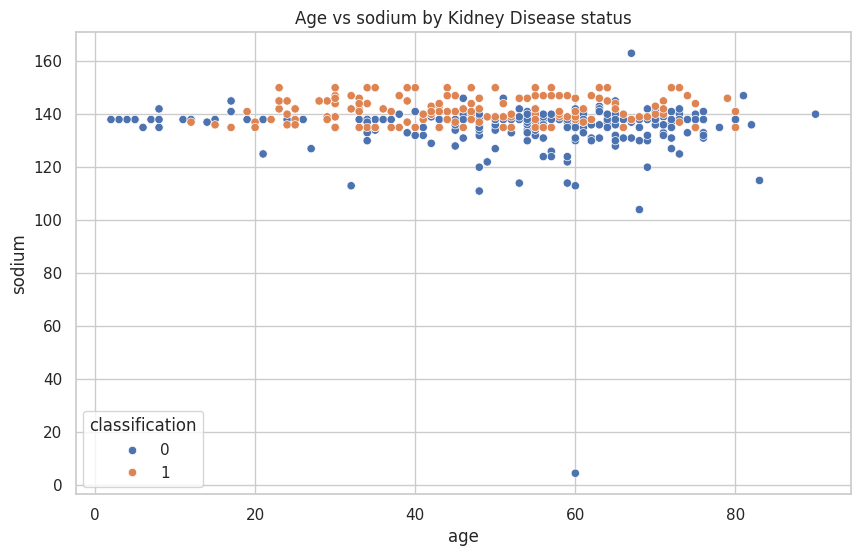

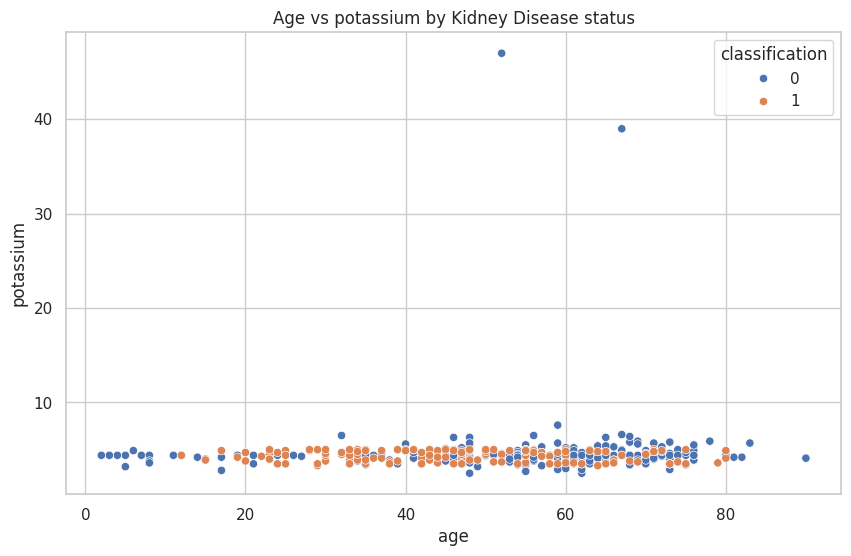

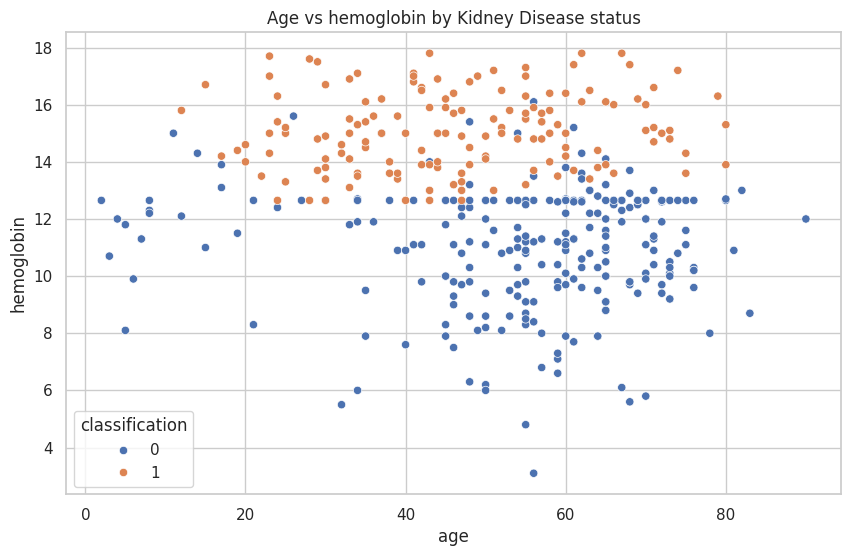

In [24]:
# Activity 2.3: Multivariate analysis
print("\n=== Multivariate Analysis ===")

# Age vs all continuous columns
cont_cols = ['blood_pressure', 'specific_gravity', 'albumin',
             'blood_glucose_random', 'blood_urea', 'serum_creatinine',
             'sodium', 'potassium', 'hemoglobin']

for col in cont_cols:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='age', y=col, hue='classification', data=df)
    plt.title(f'Age vs {col} by Kidney Disease status')
    plt.show()


=== Correlation Analysis ===


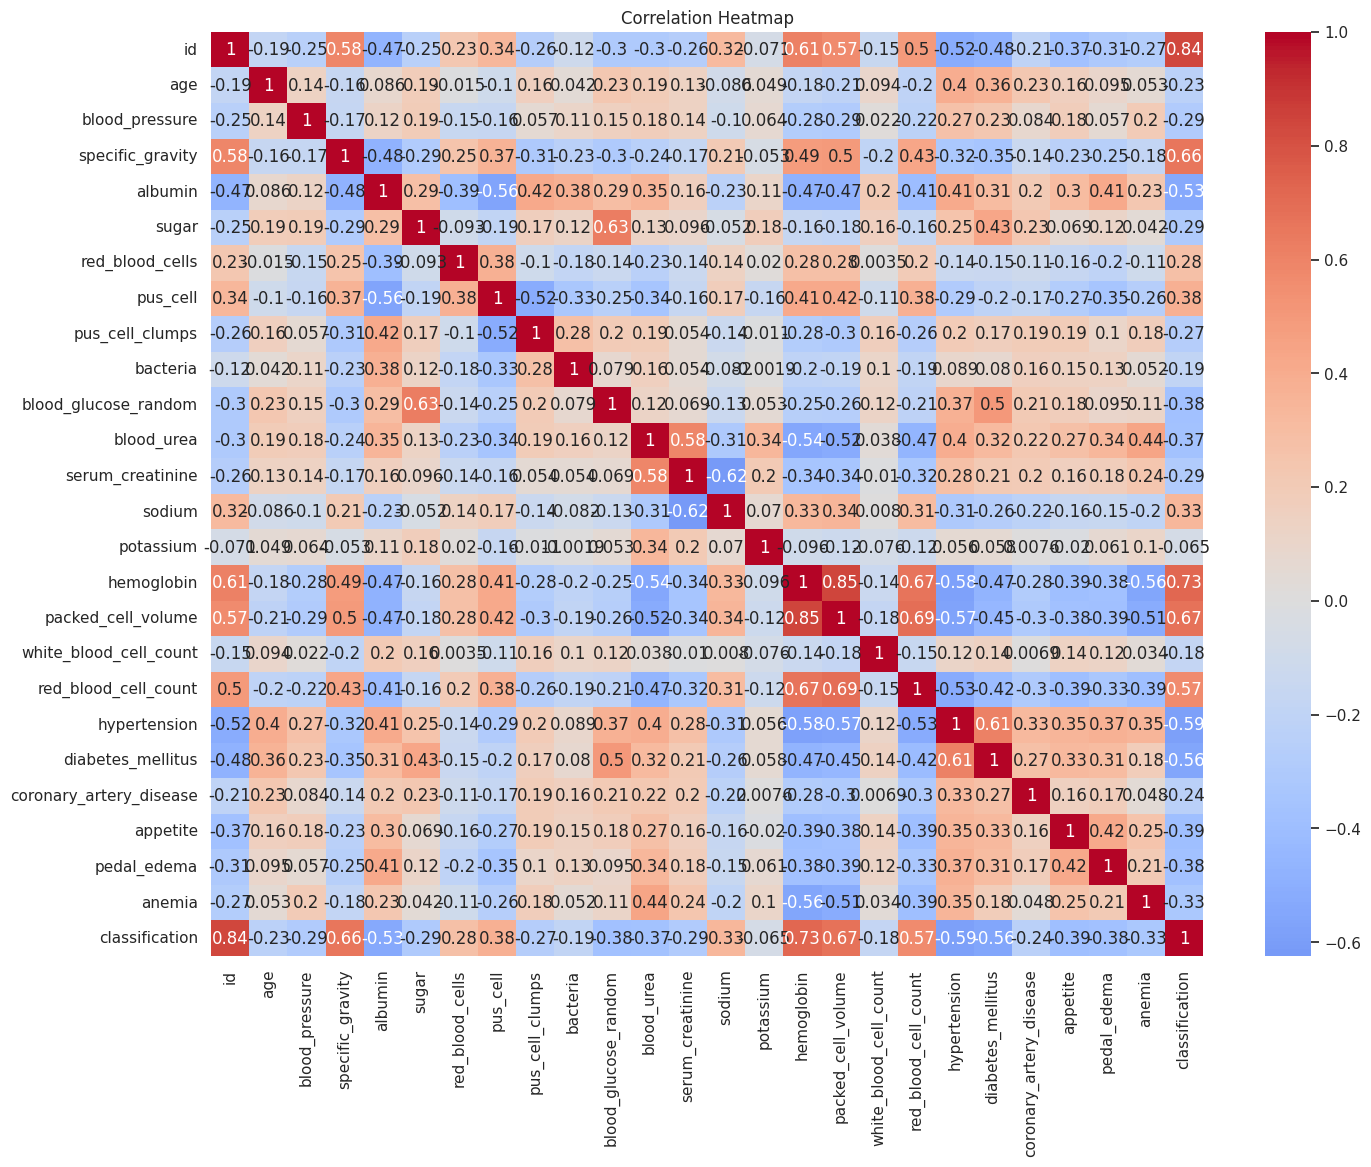


Top features correlated with target:
classification             1.000000
id                         0.838528
hemoglobin                 0.726368
packed_cell_volume         0.673129
specific_gravity           0.659504
red_blood_cell_count       0.566163
pus_cell                   0.375154
sodium                     0.334900
red_blood_cells            0.282642
potassium                 -0.065218
white_blood_cell_count    -0.177571
bacteria                  -0.186871
age                       -0.227842
coronary_artery_disease   -0.236088
pus_cell_clumps           -0.265313
serum_creatinine          -0.291245
blood_pressure            -0.293693
sugar                     -0.294555
anemia                    -0.325396
blood_urea                -0.369393
pedal_edema               -0.375154
blood_glucose_random      -0.379321
appetite                  -0.393341
albumin                   -0.531562
diabetes_mellitus         -0.559060
hypertension              -0.590438
Name: classification, dtyp

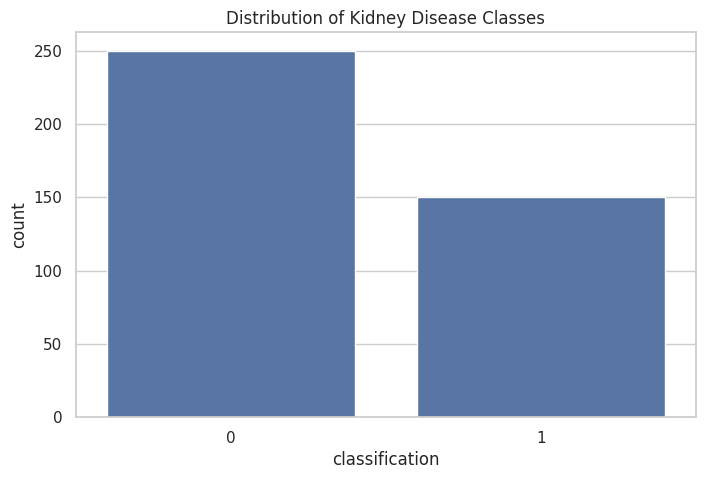

In [25]:
print("\n=== Correlation Analysis ===")
plt.figure(figsize=(16, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Top correlated features with target
print("\nTop features correlated with target:")
print(corr_matrix['classification'].sort_values(ascending=False))

# Target class distribution
print("\n=== Target Class Distribution ===")
plt.figure(figsize=(8, 5))
sns.countplot(x='classification', data=df)
plt.title('Distribution of Kidney Disease Classes')
plt.show()

In [26]:
print(df['classification'].value_counts())

classification
0    250
1    150
Name: count, dtype: int64


In [27]:
print("\n=== Data Preprocessing ===")

# Separate independent and dependent variables
X = df.drop('classification', axis=1)
y = df['classification']

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)



=== Data Preprocessing ===


In [28]:
print("\nFirst 5 rows of scaled data:")
print(X_scaled.head())


First 5 rows of scaled data:
         id       age  blood_pressure  specific_gravity   albumin     sugar  \
0 -1.727726 -0.210031        0.254214          0.421486  0.076249 -0.380269   
1 -1.719066 -2.627234       -1.972476          0.421486  2.363728 -0.380269   
2 -1.710406  0.615355        0.254214         -1.421074  0.838742  2.507853   
3 -1.701745 -0.210031       -0.488016         -2.342354  2.363728 -0.380269   
4 -1.693085 -0.033163        0.254214         -1.421074  0.838742 -0.380269   

   red_blood_cells  pus_cell  pus_cell_clumps  bacteria  ...  hemoglobin  \
0          0.36489  0.484322        -0.342518 -0.241249  ...    1.053226   
1          0.36489  0.484322        -0.342518 -0.241249  ...   -0.457965   
2          0.36489  0.484322        -0.342518 -0.241249  ...   -1.084556   
3          0.36489 -2.064742         2.919556 -0.241249  ...   -0.494823   
4          0.36489  0.484322        -0.342518 -0.241249  ...   -0.347390   

   packed_cell_volume  white_blood_cel

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nShape of training set:", X_train.shape)
print("Shape of testing set:", X_test.shape)


Shape of training set: (320, 25)
Shape of testing set: (80, 25)


In [30]:
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

files.download('X_train.npy')
files.download('X_test.npy')
files.download('y_train.npy')
files.download('y_test.npy')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>